In [12]:
import UtilStock
import datapreprocess
import pymssql as mssql

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, LSTM, Conv1D, TimeDistributed, Dropout
from tensorflow.keras.layers import LeakyReLU

In [14]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [15]:

#data params
train_ratio = 0.7

# Convolution
kernel_size = 3
filters = 64
pool_size = 2

feature_num = 19
sample_size = 1000
date_size = 10


In [16]:
# 트레인 테스트 데이터 생성
server, user, password, database = UtilStock.ParseConfig('config.ini')
connect = mssql.connect(server=server, user=user, password=password, database=database, charset='UTF8')
cur = connect.cursor()
info = UtilStock.LoadStockInfo(cur)
data, label = datapreprocess.getFinanceInfoLabelto2DArray(cur, info, data_size= sample_size, date_size= date_size, scaler=True)


ATA_WEEK 185750    
sql: SEL_STOCK_TRAINING_DATA_WEEK 043260    
sql: SEL_STOCK_TRAINING_DATA_WEEK 060540    
sql: SEL_STOCK_TRAINING_DATA_WEEK 031440    
sql: SEL_STOCK_TRAINING_DATA_WEEK 002390    
sql: SEL_STOCK_TRAINING_DATA_WEEK 029960    
sql: SEL_STOCK_TRAINING_DATA_WEEK 033200    
sql: SEL_STOCK_TRAINING_DATA_WEEK 250060    
sql: SEL_STOCK_TRAINING_DATA_WEEK 044450    
sql: SEL_STOCK_TRAINING_DATA_WEEK 023900    
sql: SEL_STOCK_TRAINING_DATA_WEEK 214390    
sql: SEL_STOCK_TRAINING_DATA_WEEK 034230    
sql: SEL_STOCK_TRAINING_DATA_WEEK 063170    
sql: SEL_STOCK_TRAINING_DATA_WEEK 006580    
sql: SEL_STOCK_TRAINING_DATA_WEEK 300080    
sql: SEL_STOCK_TRAINING_DATA_WEEK 271980    
sql: SEL_STOCK_TRAINING_DATA_WEEK 054090    
sql: SEL_STOCK_TRAINING_DATA_WEEK 052670    
sql: SEL_STOCK_TRAINING_DATA_WEEK 053660    
sql: SEL_STOCK_TRAINING_DATA_WEEK 093370    
sql: SEL_STOCK_TRAINING_DATA_WEEK 331380    
sql: SEL_STOCK_TRAINING_DATA_WEEK 272290    
sql: SEL_STOCK_TRAINING_DATA_WEEK 0

In [17]:
data.shape

(33350, 10, 19)

In [18]:
train_Data = data[ 0 : int(len(data) * train_ratio)]
train_Label = label[ 0 : int(len(data) * train_ratio)]

test_Data = data[int(len(data) * train_ratio) : len(data)]
test_Label = label[int(len(data) * train_ratio) : len(data)]

In [19]:

model = Sequential()
#model.add(LSTM(4, activation='tanh', input_shape=(date_size,feature_num)))
model.add(LSTM(50, return_sequences=True, input_shape=(date_size, feature_num)))
model.add(LSTM(64, return_sequences=False))
#model.add(Dropout(0, 2))
#model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

print('Model Build...')
model.summary()

Model Build...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 50)            14000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 43,505
Trainable params: 43,505
Non-trainable params: 0
_________________________________________________________________


In [20]:

print('Train...')
model.fit(train_Data, train_Label,
            epochs=100,
            batch_size=32, verbose=2,
            validation_data=(test_Data, test_Label))

testPredict = model.predict(test_Data)
testScore = math.sqrt(mean_squared_error(test_Label, testPredict))
print('Train Score: %.2f RMSE' % testScore)

fig = plt.figure(facecolor='white', figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(test_Label, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()
'''
score, acc = model.evaluate(test_Data, test_Label)
print('Test score:', score)
print('Test accuracy:', acc)
'''

Train...
Train on 23345 samples, validate on 10005 samples
Epoch 1/100


Train Score: 0.03 RMSE


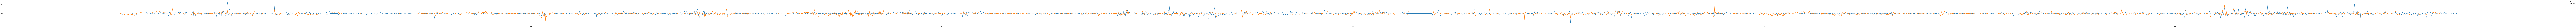

In [12]:
testPredict = model.predict(test_Data)
testScore = math.sqrt(mean_squared_error(test_Label, testPredict))
print('Train Score: %.2f RMSE' % testScore)

fig = plt.figure(facecolor='white', figsize=(100, 5))
ax = fig.add_subplot(111)
ax.plot(test_Label, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()

In [13]:
model.save('model02.h5')